<a href="https://colab.research.google.com/github/KaushikDasarii/kaushik/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 BEFORE Hyperparameter Tuning
Accuracy: 0.885
Precision: 0.8350515463917526
Recall: 0.9204545454545454
F1 Score: 0.8756756756756757
ROC AUC Score: 0.9557629870129871

 AFTER Hyperparameter Tuning
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.885
Precision: 0.8421052631578947
Recall: 0.9090909090909091
F1 Score: 0.8743169398907104
ROC AUC Score: 0.9545454545454545


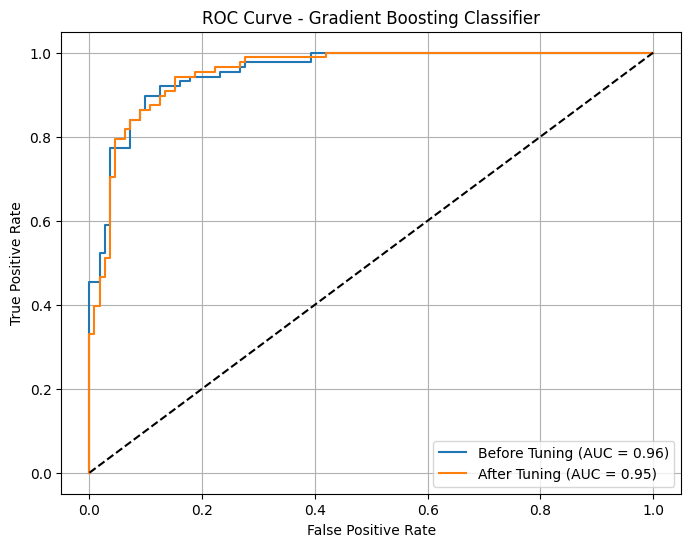

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

# Create synthetic classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           n_informative=15, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# BEFORE Hyperparameter Tuning
# ------------------------------
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(" BEFORE Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ------------------------------
# Hyperparameter Tuning with GridSearchCV
# ------------------------------
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# ------------------------------
# AFTER Hyperparameter Tuning
# ------------------------------
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\n AFTER Hyperparameter Tuning")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

# ------------------------------
# Plot ROC Curve
# ------------------------------
fpr_before, tpr_before, _ = roc_curve(y_test, y_proba)
fpr_after, tpr_after, _ = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_before, tpr_before, label='Before Tuning (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot(fpr_after, tpr_after, label='After Tuning (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_best)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend()
plt.grid(True)
plt.show()


 BEFORE Hyperparameter Tuning
MSE: 3518.4076419652592
MAE: 47.18885395454488
R² Score: 0.9095235114625758

 AFTER Hyperparameter Tuning
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
MSE: 3518.4076419652592
MAE: 47.18885395454488
R² Score: 0.9095235114625758


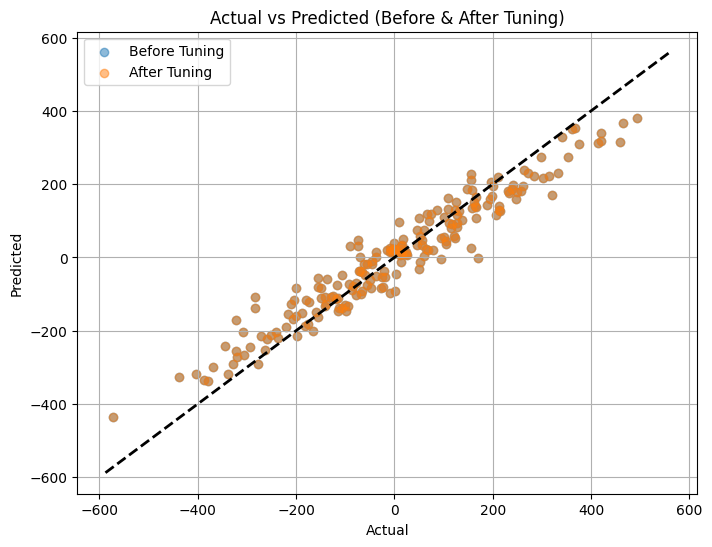

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=10, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# BEFORE Hyperparameter Tuning
# ------------------------------
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" BEFORE Hyperparameter Tuning")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# ------------------------------
# Hyperparameter Tuning
# ------------------------------
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# ------------------------------
# AFTER Hyperparameter Tuning
# ------------------------------
y_pred_best = best_model.predict(X_test)

print("\n AFTER Hyperparameter Tuning")
print("Best Parameters:", grid_search.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))

# ------------------------------
# Plot Predicted vs Actual
# ------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Before Tuning')
plt.scatter(y_test, y_pred_best, alpha=0.5, label='After Tuning')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Before & After Tuning)")
plt.legend()
plt.grid(True)
plt.show()
